In [1]:
from vision_transformers.models.vit import vit_b_p16_224
from torchvision import transforms

import cv2
import torch
import matplotlib.pyplot as plt

In [3]:
model = vit_b_p16_224(pretrained=True)

Loading vit_b_p16_224 pretrained weights
Loading Torchvision pretrained weights


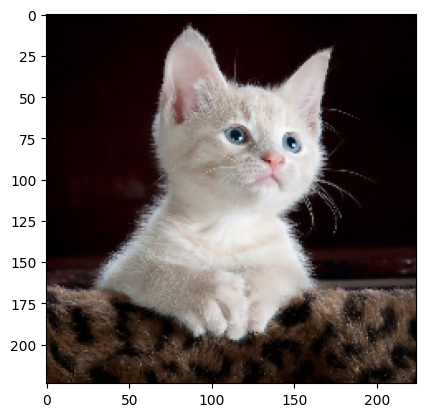

In [4]:
image = cv2.imread('../example_test_data/cat.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255.
image = cv2.resize(image, (224, 224))
plt.imshow(image)

In [5]:
image_tensor = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)
print(image_tensor.shape)

torch.Size([1, 3, 224, 224])


In [6]:
tfms = transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                             std=[0.229, 0.224, 0.225])
image_tensor = tfms(image_tensor)

In [7]:
with open("../example_test_data/imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

In [8]:
categories

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python',
 'Indian cobr

In [9]:
model.eval()
with torch.no_grad():
    outputs = model(image_tensor)

probs = torch.softmax(outputs, dim=-1)
class_id = probs.argmax()
class_name = categories[class_id]

In [10]:
print(probs[0][class_id])
class_name

tensor(0.4356)


'Egyptian cat'